In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

# Neural Networks (Deep Learning)
- deep learning algoruthms are often tailored very carefully to a specific use case
- MLPs (Multilayer perceptrons / vanilla) are feed-forward neural networks

## The neural network model
- viewed as generalizations of linear models that perform multuple stages of processing to come to a decision
    - remember linear regressor: $ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

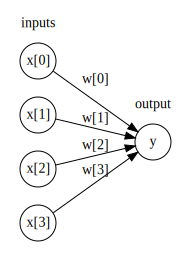

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

- here, in the linear regressor example, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the noe on the right represents the output, which is a weighted sum of the inputs
- MLPs compute the weighted sum)s_ repeatedly, first in hidden units as an intermediate processing step, and again using weighted sums to yield the final result


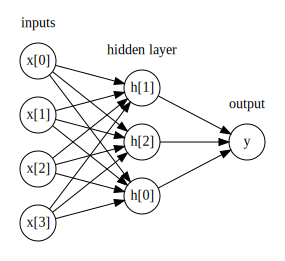

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- the models has a lot more coefficients (called weights) to learn
- computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this more powerful than a linear model we apply a nonlinear function to the result:
1. rectifying nonlinearity or rectified linear unit (RELU)
2. tangens hyperbolicus (tanh)

The result of this function is then used in the weighted sum that computes the output $ŷ$

Text(0, 0.5, 'relu(x), tanh(x)')

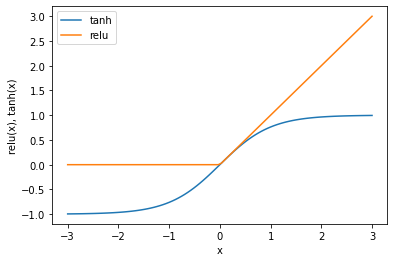

In [7]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- relu cuts off values below zero
- tanh saturates to -1 for low input values and +1 for high input values
- Either function allows the neural network to learn much more complicated functions than a linear model

For a small neural network, the full formula for computing $ŷ$ in the case of regression (using the nonlinear function of tanh) would be:
- $h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]$

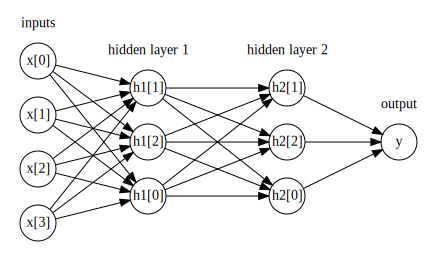

In [9]:
display(mglearn.plots.plot_two_hidden_layer_graph())

- adding many of these layers of computation is what inspired the term "deep learning"

## Tuning neural networks


Text(0, 0.5, 'Feature 1')

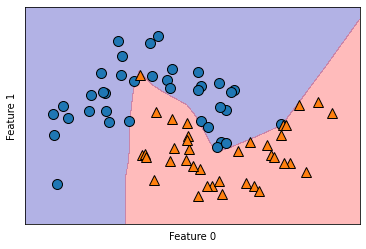

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/home/friend/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

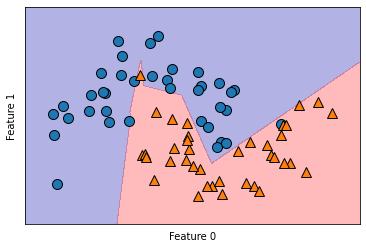

In [21]:
# reducing the number of hidden nodes reduces the complexity of the model.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- The default nonlinearity is relu.
- with only 10 hidden units, the decision bounday looks ragged.
- with a single layer, this means the decision function will be made up of 10 straight line segments. 
- adding more hidden units, a second hidden layer, or use tanh nonlinearity for a smoother decision boundary

Text(0, 0.5, 'Feature 1')

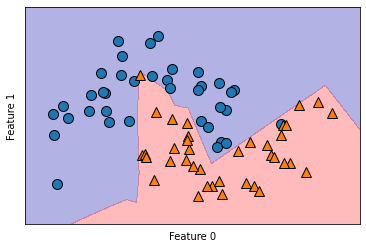

In [23]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
    hidden_layer_sizes=[10,10]
)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [ ]:
mlp = MLPClassifier(solver='lbfgs', acitvation='tanh'
    random_state=0, hidden_layer_sizes=[10,10]
)
mlp.fit(X_train, y_train)